---
---

# ANALISIS DE DATOS BANCARIOS PARA DETERMINAR LA APROBACION O RECHAZO DE CREDITOS

---
---


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # Librerias de graficos
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("loan_data.csv")
df.head(5)

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,employed,Rejected
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,unemployed,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved


In [3]:
# Elimino columna que no me sirve para el analisis
df = df.drop(columns=['Text'])

In [4]:
# Cambio nombre de las columnas.
headers = ["Ingreso", "Score_Credito", "Monto_Deuda", "Deuda/Ingreso", "Empleo", "Credito"]
df.columns = headers

In [5]:
# Convierto los resultados de las ultimas columnas a valores numericos, ya que hay solo dos posibles resultados, 0 y 1 tanto
# si es para el valor "Aprobado" y "Rechazado" como con la otra columna donde los valores son "Empleado" y "Desempleado"
df.Credito = df.Credito.replace(['Rejected'], 0)
df.Credito = df.Credito.replace(['Approved'], 1)

df.Empleo = df.Empleo.replace(['unemployed'], 0)
df.Empleo = df.Empleo.replace(['employed'], 1)

In [6]:
df.sample(5)

,Ingreso,Score_Credito,Monto_Deuda,Deuda/Ingreso,Empleo,Credito
6567,91592,823,47020,23.96,0,0
6181,155864,395,91840,31.93,0,0
19383,59574,691,1178,48.61,1,1
16222,193198,798,62203,23.92,1,1
6448,112825,690,62472,44.08,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ingreso        24000 non-null  int64  
 1   Score_Credito  24000 non-null  int64  
 2   Monto_Deuda    24000 non-null  int64  
 3   Deuda/Ingreso  24000 non-null  float64
 4   Empleo         24000 non-null  int64  
 5   Credito        24000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.1 MB


In [8]:
df.Empleo.value_counts()

0    12007
1    11993
Name: Empleo, dtype: int64

In [9]:
conteo = df.Empleo.value_counts()

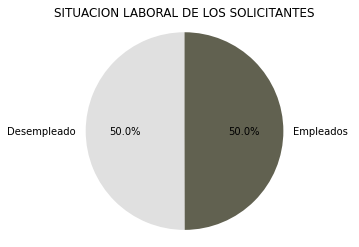

In [10]:
etiquetas = ['Empleados' if val == 1 else 'Desempleado' for val in conteo.index]

plt.pie(conteo, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['#E0E0E0', '#616150'])
plt.title('SITUACION LABORAL DE LOS SOLICITANTES')
plt.axis('equal')  # Mantener forma de círculo

plt.show()

In [11]:
df.Credito.value_counts()

0    20067
1     3933
Name: Credito, dtype: int64

In [12]:
conteo = df.Credito.value_counts()

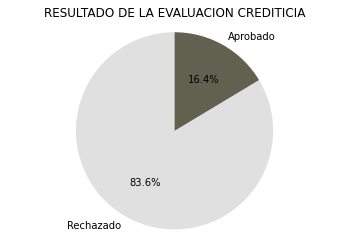

In [13]:
etiquetas = ['Aprobado' if val == 1 else 'Rechazado' for val in conteo.index]

plt.pie(conteo, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['#E0E0E0', '#616150'])
plt.title('RESULTADO DE LA EVALUACION CREDITICIA')
plt.axis('equal')  # Mantener forma de círculo

plt.show()

---

### REGRESION LOGISTICA

---

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [15]:
X = df[['Score_Credito']]  # variable independiente (predictora) por ahora uso 1 sola variable
y = df['Credito']          # variable dependiente (objetivo)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)  # entrenar el modelo

LogisticRegression()

In [18]:
y_pred = modelo.predict(X_test) # hacer que formule predicciones el modelo

In [19]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# La matris es
#           Prediccion=0     Prediccion=1
#Real=0       TN (true Neg)  FP (false positiv)
#Real=1       FN (false neg) TP (true positiv)

Matriz de confusión:
[[3996    0]
 [ 804    0]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      3996
           1       0.00      0.00      0.00       804

    accuracy                           0.83      4800
   macro avg       0.42      0.50      0.45      4800
weighted avg       0.69      0.83      0.76      4800



c:\users\hector\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hector\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hector\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Predice correctamente que no se concederia el credito (0) y efectivamente no se concedio el credito. El modelo falla cuando 804 casos de creditos fueron clasificados como no concedidos cuando deberias haberse otorgado.

In [20]:
x_range = np.linspace(X['Score_Credito'].min(), X['Score_Credito'].max(), 300).reshape(-1, 1) # definir rango de valores

In [21]:
y_prob = modelo.predict_proba(x_range)[:, 1] # determinar la probabilidad que de 1.

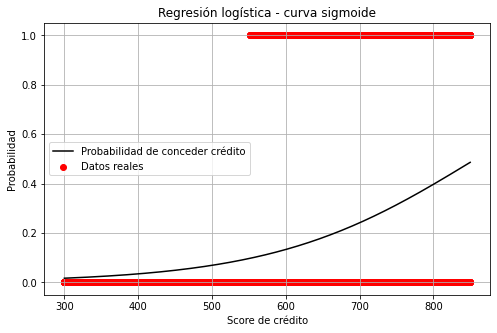

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(x_range, y_prob, label='Probabilidad de conceder crédito', color='black')
plt.scatter(X_test, y_test, color='red', label='Datos reales')
plt.xlabel('Score de crédito')
plt.ylabel('Probabilidad')
plt.title('Regresión logística - curva sigmoide')
plt.grid(True)
plt.legend()
plt.show()

Todo este calculo fue con una sola variable, ahora hago lo mismo con todas las que pueda para mejorar la capacidad de prediccion del modelo.

In [23]:
X = df[['Score_Credito', 'Ingreso', 'Monto_Deuda', 'Deuda/Ingreso', 'Empleo' ]]  # variable independiente (predictora) por ahora uso 1 sola variable
y = df['Credito']          # variable dependiente (objetivo)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)  # entrenar el modelo

LogisticRegression()

In [26]:
y_pred = modelo.predict(X_test) # hacer que formule predicciones el modelo

In [27]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[3806  190]
 [ 652  152]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      3996
           1       0.44      0.19      0.27       804

    accuracy                           0.82      4800
   macro avg       0.65      0.57      0.58      4800
weighted avg       0.79      0.82      0.79      4800




>* TN=3806, el modelo predijo que 3806 casos fueron correctamente clasificados como "no otorgado".
>* FP=190, se predijo que concedería crédito (1), pero no se concedió crédito (0), son pequeños errores
>* FN=652, el modelo predijo que no se concedería crédito (0), pero sí se concedió crédito (1), otro pequeños errores.
>* TP=152, muestra que 152 casos fueron clasificados bien como "otorgados".

>Presicion: 85% de precision para predecir valores (0) osea para no otorgar el credito. Pero su precision baja a 44% cuando tiene que predecir que el valor sea (1) osea otorgar el credito.
Entonces el modelo no es preciso y no tiene un numero considerable de errores. Las alternativas son:
>* a) Reentrenar el modelo con mas variables, cosa que no puedo hacer puesto que utilice todas las columnas posibles.
>* b) Ajustar el umbral de clasificación, que por defecto es 0,5. Esto a costa de tener mas falsos positivos.
>* c) Intentar otros modelos (luego de probar el punto b, procedo a correr otro modelo).

In [28]:
# Ajustar el umbral de clasificación.
umbral = 0.3  # Se puede ajustar este valor
y_pred = (modelo.predict_proba(X_test)[:, 1] > umbral).astype(int)

In [29]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[3306  690]
 [ 413  391]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      3996
           1       0.36      0.49      0.41       804

    accuracy                           0.77      4800
   macro avg       0.63      0.66      0.64      4800
weighted avg       0.80      0.77      0.78      4800



Interpretación
- Matriz A (sin ajustar umbral): Más conservador y comete menos errores totales, pero ignora muchos casos de crédito concedido.
- Matriz B (con umbral modificado): Más equilibrado, aumentó la cantidad de falsos positivos, pero captura más oportunidades de negocio.

Que modelo sirve mas? va a depender de la prioridad del banco, si la prioridad es no dar creditos por error, conviene utilizar el modelo A sin modificar el umbral, ahora si el banco tiene como prioridad es detectar a quienes realmente califican para el credito utilizar el modelo B con el umbral de clasificación modificado. 

Igualmente utilizo otro modelo...

---

### RANDOM FOREST

---

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
# Cargamos los datos y los dividimos en conjuntos para entrenar y testear.
y = df["Credito"]
X = df.drop(["Credito"], axis=1)
(X_train, X_test,
 y_train, y_test) = train_test_split(X,
                                     y,
                                     stratify=y,
                                     test_size=0.33,
                                     random_state=11)

In [32]:
df.sample(3)

,Ingreso,Score_Credito,Monto_Deuda,Deuda/Ingreso,Empleo,Credito
15851,191793,564,151122,11.07,1,0
7229,194196,369,150292,20.12,0,0
14493,112189,531,35370,7.13,0,0


In [33]:
# Creo un modelo de 200 arboles de decisión.
model = RandomForestClassifier(random_state=10, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)
print(f"La precisión del Random Forest es: {model.score(X_test, y_test)}")

La precisión del Random Forest es: 0.9955808080808081


In [34]:
classifier=model.fit(X_train, y_train) #Construimos el modelo sobre los datos de entrenamiento

In [35]:
predictions=classifier.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predictions,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")
print()
print ("Cuanto menor sea el valor, mejor será el rendimiento del modelo. Un MSE igual a cero indica predicciones perfectas.")

El error (rmse) de test es: 0.06647700293478881

Cuanto menor sea el valor, mejor será el rendimiento del modelo. Un MSE igual a cero indica predicciones perfectas.


Matriz de confusión
[[6603   19]
 [  16 1282]]
Los valores de la diagonal principal (a) y (d) se corresponden con los valores estimados de forma correcta por el modelo
tanto los verdaderos positivos_ TP(d), como los verdaderos negativos_TN(a)
La otra diagonal, por tanto, representa los casos en los que el modelo «se ha equivocado>>
(c) son falsos negativos_FN, (b) seran los falsos positivos_FP



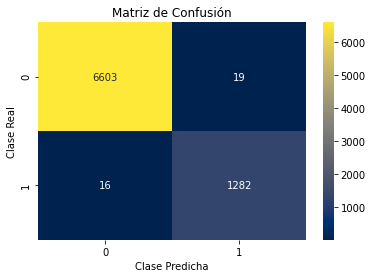


Métricas de clasificación
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6622
           1       0.99      0.99      0.99      1298

    accuracy                           1.00      7920
   macro avg       0.99      0.99      0.99      7920
weighted avg       1.00      1.00      1.00      7920

0.9955808080808081

La exactitud («accuracy«) representa el porcentaje de predicciones correctas frente al total. Es el cociente entre los
casos bien clasificados por el modelo (verdaderos positivos y verdaderos negativos, es decir, los valores en la 
diagonal de la matriz de confusión), y la suma de todos los casos.
Cuando un conjunto de datos es poco equilibrado, no es una métrica útil

La sensibilidad («Recuperacion|Recall«) representa la habilidad del modelo de detectar los casos relevantes, es mas util
cuando los datos no son tan equilibrados. En otras palabras, representa la tasa

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Matriz de confusión")
print(confusion_matrix(y_test,predictions))
print("Los valores de la diagonal principal (a) y (d) se corresponden con los valores estimados de forma correcta por el modelo")
print("tanto los verdaderos positivos_ TP(d), como los verdaderos negativos_TN(a)")
print("La otra diagonal, por tanto, representa los casos en los que el modelo «se ha equivocado>>")
print("(c) son falsos negativos_FN, (b) seran los falsos positivos_FP")
print()
# Obtener la matriz de confusión
cm = confusion_matrix(y_test, predictions)

# Crear el mapa de calor de la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis')

# Agregar etiquetas y títulos
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')

# Mostrar el gráfico
plt.show()

print()
print("Métricas de clasificación")
print("-----------------------------------------------------")
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

print ()
print ("La exactitud («accuracy«) representa el porcentaje de predicciones correctas frente al total. Es el cociente entre los")
print ("casos bien clasificados por el modelo (verdaderos positivos y verdaderos negativos, es decir, los valores en la ")
print ("diagonal de la matriz de confusión), y la suma de todos los casos.")
print ("Cuando un conjunto de datos es poco equilibrado, no es una métrica útil")
print ()
print ("La sensibilidad («Recuperacion|Recall«) representa la habilidad del modelo de detectar los casos relevantes, es mas util")
print ("cuando los datos no son tan equilibrados. En otras palabras, representa la tasa de verdaderos positivos")
print ("(True Positive Rate) ó TP. Es la proporción entre los casos positivos bien clasificados por el modelo, respecto al ")
print ("total de positivos.")

> #### Interpretando el modelo, con este se obtiene un excelente rendimiento, predice correctamente casi todos los casos, con errores mínimos. Esta listo para utilizarlo para predecir si al cliente se le otorga o no un crédito.

<h1>Header 1,title<h1>

<h5>Header 5<h5>

<code>Python
str = "This is a block level code"
print(str)
</code>

<a id = "division_ID"text goes here></a>